# Erdos-Renyi random networks

In [1]:
import random
import networkx as nx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme(style="ticks", context="notebook")

## Write a random graph generator

In [2]:
def random_graph(N, p):
    
    G = nx.Graph()
    
    nodes = range(N)
    G.add_nodes_from(nodes)
    
    edges = []
    
    for i in nodes:
        for j in nodes[:i]:
            if random.random() < p:
                edges.append([i, j])
    
    G.add_edges_from(edges)
    
    return G

In [3]:
G = random_graph(10, 0.1)

In [4]:
N = 100
p = 0.8 / N 
G = random_graph(N, p)

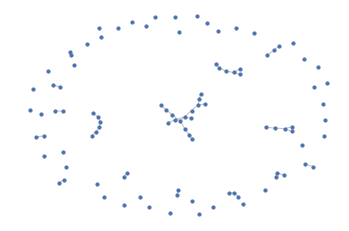

In [5]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

nx.draw_networkx(G, **params)

sb.despine(bottom=True, left=True)

plt.show()

## Analyse characteristics

In [6]:
N = 1000
p = 4 / N

G = nx.erdos_renyi_graph(N, p, seed=1)

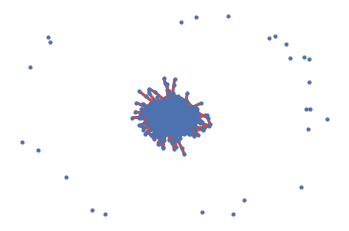

In [7]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=pos, **params)

# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
# highlight largest connected component
nx.draw_networkx_edges(G0, pos=pos, width=3.0, edge_color="r")

# draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.4, width=3.0, edge_color="r")


sb.despine(bottom=True, left=True)

In [8]:
print(f"Connected: {nx.is_connected(G)}")
print(f"# connected components: {len(list(nx.connected_components(G)))}")

print()
print(f"Size of largest connected component: {len(G0)}")
print(f"Prop. of nodes in it: {len(G0) / N:.2f}")

print()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print(f"Average degree: {np.average(degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(G)}")

Connected: False
# connected components: 26

Size of largest connected component: 974
Prop. of nodes in it: 0.97

Average degree: 3.978
Clustering coefficient: 0.0027341269841269842


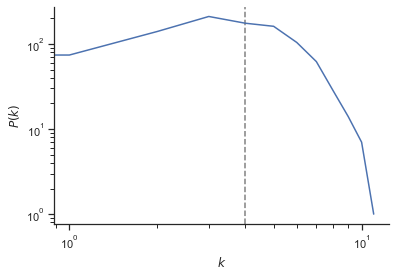

In [9]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()

ax.plot(deg, counts)

ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

## Building the giant component

In [10]:
N = 1000

ks = np.arange(0, 5.1, 0.1)

ps = ks / (N - 1)

n_reps = 10

props_arr = np.zeros((len(ps), n_reps))

for i, p in enumerate(ps):
    for rep in range(n_reps):
        G = nx.erdos_renyi_graph(N, p)
        
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])
        
        prop = len(G0) / N
        props_arr[i, rep] = prop

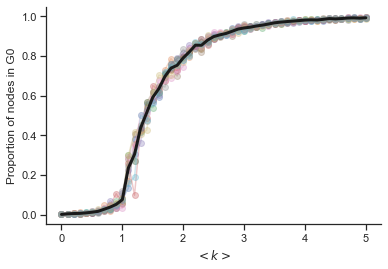

In [11]:
fig, ax = plt.subplots()

ax.plot(ks, props_arr[:, :], "-o", alpha=0.3)

ax.plot(ks, np.average(props_arr, axis=1), "k-", lw=3)

ax.set_ylabel("Proportion of nodes in G0")
ax.set_xlabel(r"$< k >$")

sb.despine()

## Configuration model

In [12]:
N = 20
p = 6 / N
G = random_graph(N, p)

degree_sequence = [d for n, d in G.degree()]

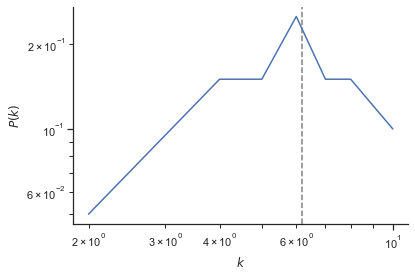

In [14]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()
ax.plot(deg, counts / N)
ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

In [33]:
G_conf = nx.configuration_model(degree_sequence)
G_conf = nx.Graph(G_conf)

degree_sequence_conf = [d for n, d in G.degree()]

In [34]:
print(G)

Graph with 20 nodes and 62 edges


In [35]:
print(G_conf)

Graph with 20 nodes and 58 edges


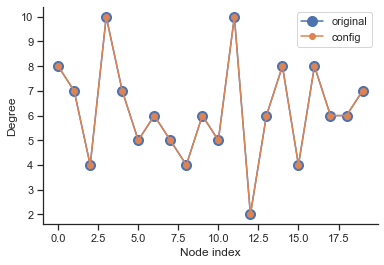

In [36]:
deg_conf, counts_conf = np.unique(degree_sequence_conf, return_counts=True)

fig, ax = plt.subplots()
ax.plot(degree_sequence, "o-", ms=10, label="original")
ax.plot(degree_sequence_conf, "o-", label="config")

ax.set_xlabel("Node index")
ax.set_ylabel("Degree")
#plt.yscale("log")
#plt.xscale("log")

ax.legend()

sb.despine()

In [37]:
print(G)
print(G_conf)

Graph with 20 nodes and 62 edges
Graph with 20 nodes and 58 edges


In [38]:
pos = nx.spring_layout(G)

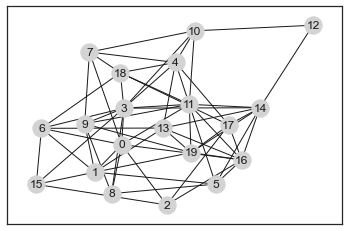

In [39]:
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, node_color="lightgrey")

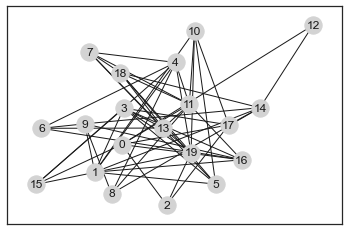

In [43]:
nx.draw_networkx(G_conf, pos=pos, node_color="lightgrey")

In [41]:
G_conf.remove_edges_from(nx.selfloop_edges(G_conf))

In [44]:
# pos

# Other types of random graphs
## Watts-Strogatz 

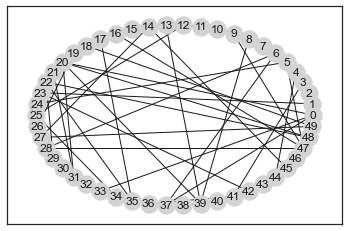

In [53]:
ws = nx.watts_strogatz_graph(50, 4, 0.3)

pos_ws = nx.circular_layout(ws)
nx.draw_networkx(ws, pos=pos_ws, node_color="lightgrey")

In [73]:
clu, sp = [], []
ps = np.linspace(0.001,1,100)
for p in ps:
    ws = nx.watts_strogatz_graph(1000, 6, p)
    clu.append(nx.average_clustering(ws))
    sp.append(nx.average_shortest_path_length(ws))

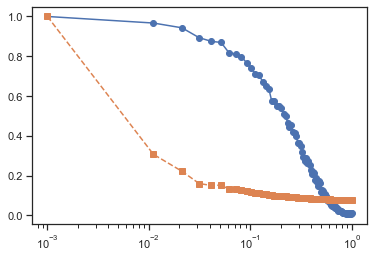

In [74]:
plt.semilogx(ps, np.array(clu)/clu[0],'-o');
plt.semilogx(ps, np.array(sp)/sp[0],'--s');

In [90]:
#introduce tqdm

## Barabasi Albert 

In [76]:
ba = nx.barabasi_albert_graph(300, 3)

In [80]:
degs = ba.degree()
aa, bb = np.histogram(list(dict(degs).values()))

In [91]:
ws_degs = ws.degree()
ws_aa, ws_bb = np.histogram(list(dict(ws_degs).values()))

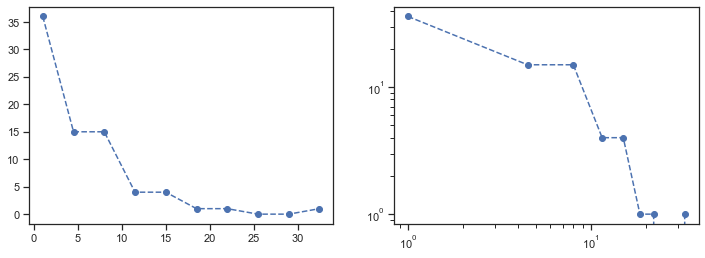

In [93]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(bb[:-1], aa, 'o--')
# plt.plot(ws_bb[:-1], ws_aa, 'r-')
plt.subplot(122)
plt.loglog(bb[:-1], aa, 'o--')
# plt.loglog(ws_bb[:-1], ws_aa, 'r-')

# Social networks?
## Les Miserables

In [87]:
les = nx.les_miserables_graph()
les.number_of_nodes(), les.number_of_edges()

(77, 254)

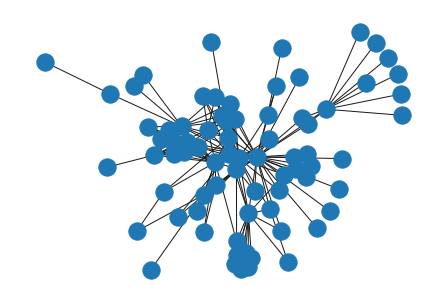

In [100]:
nx.draw(les)

In [88]:
degs = les.degree()
aa, bb = np.histogram(list(dict(degs).values()))

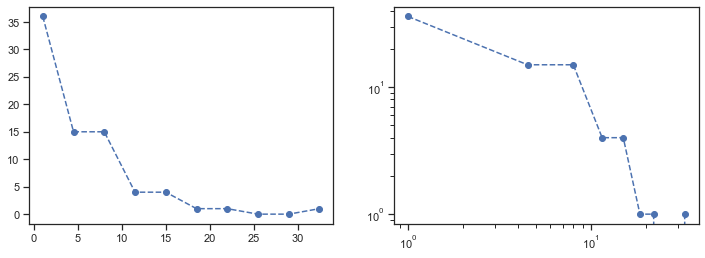

In [89]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(bb[:-1], aa, 'o--')
plt.subplot(122)
plt.loglog(bb[:-1], aa, 'o--')

## Francis Bacon

In [96]:
ff = nx.florentine_families_graph()
ff.number_of_nodes(), ff.number_of_edges()

(15, 20)

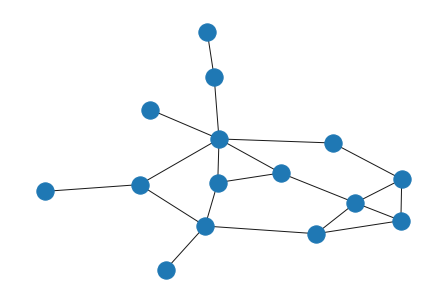

In [97]:
nx.draw(ff)

In [98]:
degs = ff.degree()
aa, bb = np.histogram(list(dict(degs).values()))

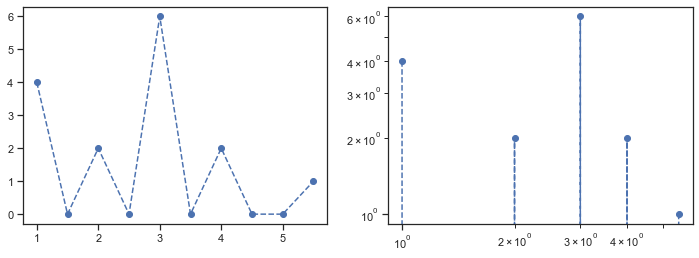

In [99]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(bb[:-1], aa, 'o--')
plt.subplot(122)
plt.loglog(bb[:-1], aa, 'o--')